# Data Science - Minneapolis & St. Paul Public Safety  Analysis    Capstone Project

Afewerk Nune, May 6th, 2019

## I. Definition
### Project Overivew

It's a common knowldege to hear about police excessibe power usage implemented with, stop and frisk, and gender & racial bias and racial biases through the overwhelming media available. When an incident occurs, usually its followed by a response from poublic and relatives of the person stopped by the police. These social interactions have been with us for centuries but what changed this time, is the level of awareness and people’s reaction to each incidents. Therefore, this report takes us the data collected by Minneapolis.gov for precinct 1 to 5 and explores indeapth insite in to the dataset.

This report examines police stops during Oct 31, 2016 to Apr 29, 2019. There are 119924 data points with 19 columns full of raw data downloaded from www.minneaplicemn.gov. In this report we'll be using most of the columns to gain insight in to how public safety data is populated through responsed data, race, ethnicity and neighborhood.

This data only focuses on www.minneaplicemn.gov reported data and not including how the data was collected or maintained. It is also possible that some agencies report only if there are injuries, potential injuries, or verbal complaints (of involved suspects or citizens) as a result of a confrontation.

### Problem to solve:
1. Examine how each precinct handled calls for given demographics. 
2. Identify and describe outliers with in the dataset
3. Provide predictions for future reporting
4. Explore post stop reports and show who gets the most citation

## II. Methodology

### Getting the data & Data Processing

The data is collected from the www.minneapolismn.gov/opendata readily available for public at anytime. Although there are multiple formats available to download, excel format is used for this report. 

The responseDate column had data, time, and code at first. Since there is only one time data in the response date, the time values have been dropped from analysis. The codes 'T' & '000Z' have been placed at the beggining & end of the responseDate time values also have been dropped. 

For manupulation data numpy padas, and matplotlib libraries have been used to calculate, analyze and plots for visualizations. The data is fed using pandas Dataframe module and used throughtout the code. 

## III. Analysis
### Data Exploration

In [1]:
#Major libraries that will be used throughout the report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tabulate import tabulate

All of the top 3 libraries will be used in much of this project. The __pandas__ and __numpy__ library will be the most used because of the available tools and features for data analysis. --Pandas__ library would be used to created __DataFram__ and used feature colls to rund __central tendency__, __probabilities__, __variance__, and other calculations. 
The next library would be the plotting library __"Matplotlib"__ along with __"%matplotlib inline",__ which would be used to create visualizations for the select dataset. The __%matplotlib inline__ tool allows matplot lib to show plots without calling __plt.show()__ command in jupyter notebook everytime we wanted to show plots. 

In [2]:
#The data we're going to use to do all calculations and analysis
df = pd.DataFrame(pd.read_excel('data\Police_stop_data.xlsx'))

#Printing the shape of thid data gives us the rows, columns and df.columns prints out all the column values
Time_span = (df['responseDate'].max() - df['responseDate'].min());
print('This dataset has {} raws, {} columns and spans {} days.'.format(df.shape[0], df.shape[1], Time_span))
df.columns

This dataset has 119924 raws, 19 columns and spans 910 days 00:00:00 days.


Index(['OBJECTID', 'masterIncidentNumber', 'responseDate', 'Non-Usable',
       'responseTime', 'responseCode', 'citationIssued', 'personSearch',
       'vehicleSearch', 'preRace', 'race', 'gender', 'lat', 'long', 'x', 'y',
       'policePrecinct', 'neighborhood', 'lastUpdateDate'],
      dtype='object')

The first line above shows one way how data is read in python using the pandas dataframe. The police stop data downloaded from the web[1] is stored in a local machine and read using the pandas library. 

From the "Time_Span" we see that the dataset has close to 120k rows with 19 columns and taken with in 910 days period. The columns have data with responseDates, time, search type, race, gender, geolocation, pricinct, and neighbourhood data values we can work with for this analysis. PreRace, Race, gender and neighbourhood would be looked at in detail to give us insight about police data population distribution. Next, we see central tendensy values.

In [3]:
#Lest see how the responseDate data points are populated using central tendency statistics
df_race_mean = df['responseDate'].value_counts()
df_race_mean.describe()

count    911.000000
mean     131.639956
std       38.932739
min        7.000000
25%      104.000000
50%      129.000000
75%      159.000000
max      285.000000
Name: responseDate, dtype: float64

The minimum stops with in the given period is 7 stops and a maximum of 285 stops per day. The average of police stops is at 131 people per day. These central tendensy values are for the entire dataset and not separated. The next code shows the total and average data collected per precinct.

In [206]:
grouped = pd.DataFrame(df.groupby('policePrecinct')['responseDate'].count())
grouped['average'] = grouped['responseDate'] / 911
grouped

,responseDate,average
policePrecinct,,
1.0,19237,21.116356
2.0,23446,25.736553
3.0,21528,23.631175
4.0,28653,31.452250
5.0,25839,28.363337
Unknown,1221,1.340285


### Table 1. Police stop data per precinct per data and mean values

This table is the first table that shows some disparity between each precinct data collection instea of the general population. Precinct 1 collects the least and precinct 4 collects the most data compared to the rest of the precinct. Based on the data collection, precinct 4, 5,2,3,1 are ordered cronologically in decending order for data collection. 

Next, we look at how the data is distributed accross racial distribution. The pie chart at the bottom shows the data distribution for all the races described in the data collection including Unknown and Other which are undifined. 

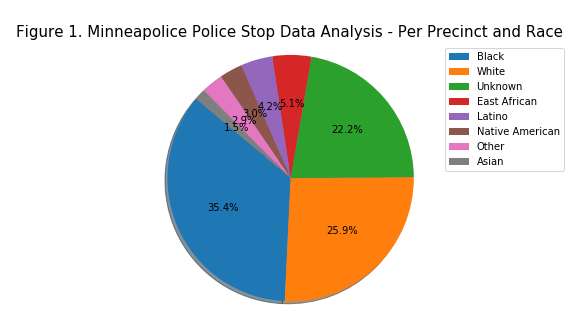

In [5]:
#generating a pie chart with the data racial demographics
Race = []
Race.append(df['race'].value_counts())
plt.figure(figsize=(10, 5))
plt.pie(Race[0], autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(Race[0].index, loc='upper right')
plt.title('\nFigure 1. Minneapolice Police Stop Data Analysis - Per Precinct and Race', size=15)
plt.axis('equal');

This data also has 'Unknown' and 'Other' races that we can't quite put in to any of the known Asian, Black, East African, Latino, Native American, and White races. Because the reports from these catagories is large, we can't just ignore the implications of these percentage. To get the true racial catagories, we have to sum 'Black' & 'East African' and 'Unknown' & 'Other' and redraw the pie chart. 

To get the population distribuition per race, we have to compare the true Minnesota Census data[2] with the police stop data per population accordingly.

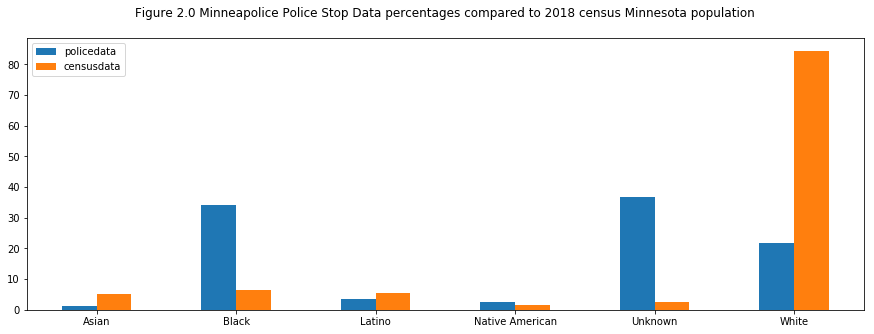

In [280]:
#Adding similar indexes
df1 = df
df['race'] = df['race'].str.replace('Other','Unknown')
df['race'] = df['race'].str.replace('East African','Black')
fill = ['preRace','race', 'gender']
df.update(df.fillna('Unknown', inplace=True))
df.update(df.fillna('Black', inplace=True))

#Create a new list and redraw the pie chart
Race1 = []
Race1.append(df['race'].value_counts())
racial = Race1[0].sort_index()

policedata = (racial.values / racial.sum())*100
censusdata = [5.1, 6.5, 5.4, 1.5, 2.5, 84.4]
races = ['Asian','Black','Latino','Native American','Unknown','White']
df2 = pd.DataFrame({'policedata': policedata, 'censusdata': censusdata}, index=races)
title = 'Figure 2.0 Minneapolice Police Stop Data percentages compared to 2018 census Minnesota population\n'
ax = df2.plot.bar(rot=0, figsize=(15,5), title=title)

This cluster bar chart shows the data with 'Black' & 'East African' grouped as 'Black' and 'Unknown' & 'Other' grouped as 'Unknown'. Both the 'policedata' and 'censusdata' are percentages taken from police stop data and directly from the census report. The police stop data for  Minnesota Black Population lives in with in Minneapolis & St. Paul areas and proportional to the disparity shown on the graph. The next group being stoped are the Unknown and since we don't have any insite in to this catagory, we can't say much about this group. 

One thing to clarify here is that, Fig 2.1, the Police stop data is taken from precinct 1 to 5 only. Fig 2.2, the 2018 Censsus data however reflects the entire state of Minnesota population per race. 

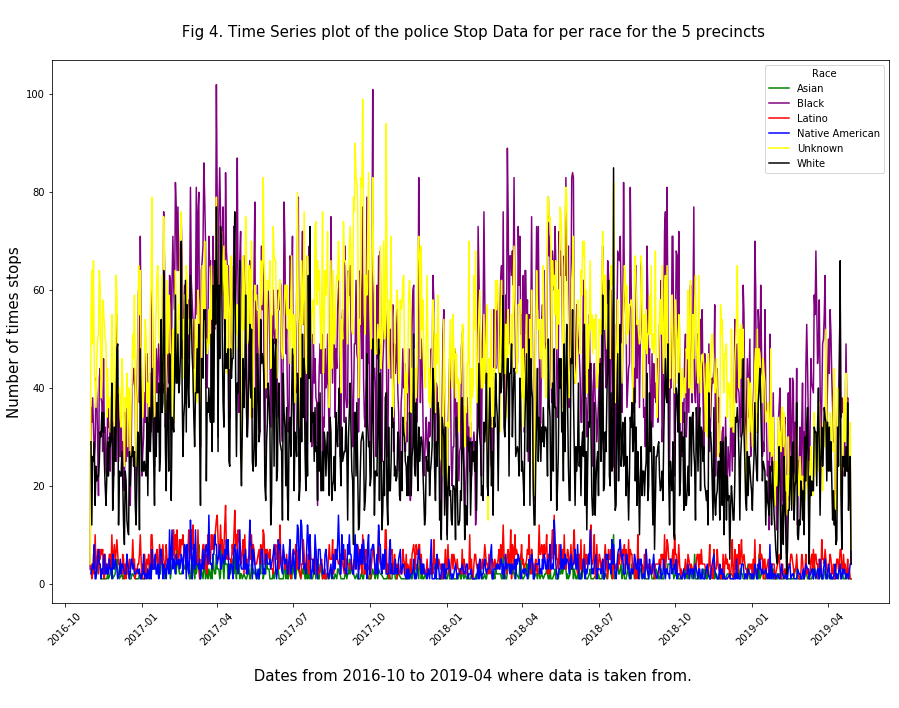

In [207]:
#Police stop data for each race and filtered per responseDate
y1 = df.loc[df['race'] == 'Asian']['responseDate'].value_counts()
y2 = df.loc[df['race'] == 'Black']['responseDate'].value_counts()
y3 = df.loc[df['race'] == 'Latino']['responseDate'].value_counts()
y4 = df.loc[df['race'] == 'Native American']['responseDate'].value_counts()
y5 = df.loc[df['race'] == 'Unknown']['responseDate'].value_counts()
y6 = df.loc[df['race'] == 'White']['responseDate'].value_counts()

#Setting up the plot layout 
plt.figure(figsize=(15, 10))
plt.subplot(1,1,1)

#Plotting each series data 'columns' with shared x 
plt.plot(y1.sort_index(), color='green', label='Asian');
plt.plot(y2.sort_index(), color='purple', label='Black');
plt.plot(y3.sort_index(), color='red', label='Latino');
plt.plot(y4.sort_index(), color='blue', label='Native American');
plt.plot(y5.sort_index(), color='yellow', label='Unknown');
plt.plot(y6.sort_index(), color='black', label='White');

#Text on the plot
plt.legend(['Asian','Black','Latino','Native American', 'Unknown', 'White'],title='Race', loc='upper right')
plt.title('\n Fig 4. Time Series plot of the police Stop Data for per race for the 5 precincts\n ', fontsize=15)
plt.ylabel('Number of times stops', fontsize=15)
plt.xlabel('\n Dates from 2016-10 to 2019-04 where data is taken from.\n', fontsize=15)
plt.xticks(rotation=45);

The plot above shows the police stop data per race filtered by the date it occured. We can see two groupings of the data. The Asian, Native Amerian, and Latino races experince an average of 20 or less stops throughout the dataset. The next group is the population from Black, White and Unknown races. As we indicated earlier, not much we can say aobut the Unknow dataset. For the most part, the purple line "Black" race graph is somewhat higher than the "Black" line "White" race graph. 

This graph also, shows the most data taken for all the races is between 2017-01 to 2017-07. This stands as the outlier for all the races in this case. 

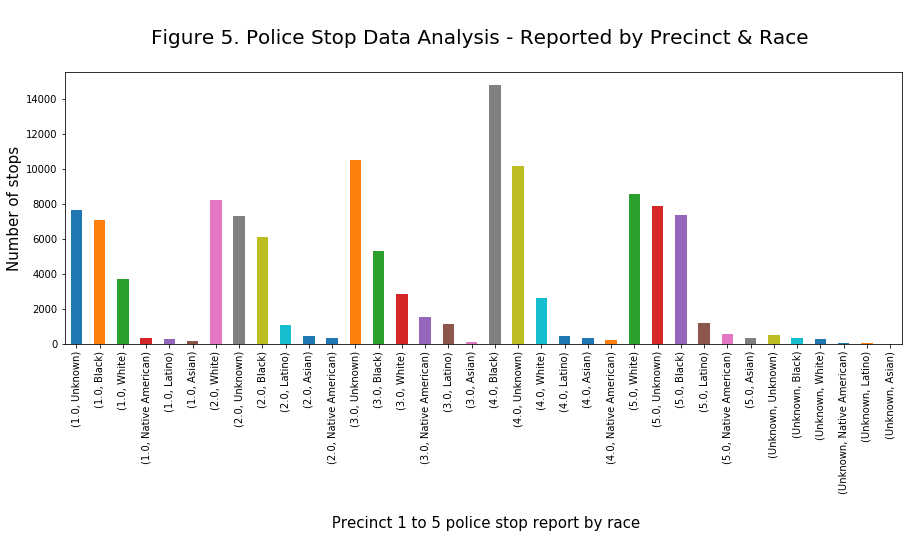

In [67]:
#Now lets look at these race desparity per pricinct and neighbourhood
plt.figure(figsize=(15,5))
df.groupby('policePrecinct')['race'].value_counts().plot(kind='bar');
plt.title('\nFigure 5. Police Stop Data Analysis - Reported by Precinct & Race \n', size=20)
plt.ylabel('Number of stops' , size=15)
plt.xlabel('\n Precinct 1 to 5 police stop report by race' , size=15);

These data revels more insight that we couldn't tell from the pie chart or the map. For District 2 and 5, a person of white race is more prone to be stopped than other races. It might also be because the white race is proportionally greater and the graph is just showing what is expected.

The next big race with small percentage change is blacks, followed by East Africans. If we look at districts 1, 3, and 4, Black people are more frequently stopped than others followed by unknown and whites. For district 4 specifically, the ratio of blacks being stopped is so high, it’s the outlier for the entire police stop per race for all district. The next part is to get the actual probability rate for each race in different precincts. We can also see that, the Asian Race being stopped by police is much lower than any other race in all precincts.

Next, let's see how the data is shapped with in the 910 days period of time.

In [ ]:
df['race'].isna().sum()

In [68]:
time_series = df.groupby('race')['responseDate','neighborhood'].describe()
time_series

responseDate                                   \
                       count unique                  top freq   
race                                                            
Asian                   1473    710  2018-07-19 00:00:00   10   
Black                  40974    911  2017-03-31 00:00:00  102   
Latino                  4222    889  2017-04-11 00:00:00   16   
Native American         3048    846  2017-08-24 00:00:00   14   
Unknown                43994    911  2017-09-22 00:00:00   99   
White                  26213    910  2018-07-19 00:00:00   85   

                                                          neighborhood         \
                               first                 last        count unique   
race                                                                            
Asian            2016-11-01 00:00:00  2019-04-29 00:00:00         1473     83   
Black            2016-10-31 00:00:00  2019-04-29 00:00:00        40974     88   
Latino           2016-11-01 00:00:00  2019-04-29 00:00:00         4222     87   
Native American  2016-11-01 00:00:00  2019-04-28 00:00:00         3048     79   
Unknown          2016-10-31 00:00:00  2019-04-29 00:00:00        43994     88   
White            2016-11-01 00:00:00  2019-04-29 00:00:00        26213     88   

                                                 
                           top  freq first last  
race                                             
Asian             Marcy Holmes   102   NaN  NaN  
Black            Downtown West  4303   NaN  NaN  
Latino                Whittier   366   NaN  NaN  
Native American  East Phillips   648   NaN  NaN  
Unknown          Downtown West  4349   NaN  NaN  
White            Downtown West  2102   NaN  NaN

### Table 2. Population distribution grouped by race, responseDate and neighborhood

The above table is a summary of the police data per race, date of response and citation issued or not. The report shows that the max values Black, Unknown, and White are 400% higher than that of Asian, East African, Latino, Native American, and Other values. We kow that East African decents are also considered that of Black race and we have to add the two to see the real value per race. Following that, we have to see the minority catagoreis percentage to that of White, Other, and Unknown race.

In [213]:
df3 = pd.DataFrame()
df1 =df.groupby('race').count()
df3['Racial'] = df1['responseDate'][[0,1,2,3,4,5]]
df3['MN_Pop (%)'] = [5.1,6.5,5.4,1.5,2.5,84.4] 
df3.index = df1.index 
print(tabulate(df3, headers=['Race', 'Value','MN_Pop (%)']))

Race               Value    MN_Pop (%)
---------------  -------  ------------
Asian               1473           5.1
Black              40974           6.5
Latino              4222           5.4
Native American     3048           1.5
Unknown            43994           2.5
White              26213          84.4


#### Table 3. Population count from 2018 census report and proportional comparison to police stop data report

Finally, we look at one last column to tell us how each call ended up after each police stop. In order to tell us, we group the data by "citationsIssued". 

In [237]:
#df4 = pd.DataFrame(df.groupby(['citationIssued','race'])['responseDate'].value_counts());
Cit_As = df.loc[df['race'] == 'Asian']['citationIssued'].value_counts();
Cit_Bl = df.loc[df['race'] == 'Black']['citationIssued'].value_counts();
Cit_La = df.loc[df['race'] == 'Latino']['citationIssued'].value_counts();
Cit_NA = df.loc[df['race'] == 'Native American']['citationIssued'].value_counts();
Cit_Un = df.loc[df['race'] == 'Unknown']['citationIssued'].value_counts();
Cit_Wh = df.loc[df['race'] == 'White']['citationIssued'].value_counts();

#Creating new table to populate all the groups who received citation
race = ['Asian','Black','Latino','Native American','Unknown','White']
Cit_vals = [Cit_As, Cit_Bl, Cit_La, Cit_NA, Cit_Un, Cit_Wh]
df4 = pd.DataFrame(Cit_vals, race)
print(tabulate(df4, headers=['Race','No', 'Unknown','Yes','Yes_Percentages']))

Race                No    Unknown    Yes
---------------  -----  ---------  -----
Asian              784        496    193
Black            23004      12291   5679
Latino            2115       1427    680
Native American   1787       1040    221
Unknown          17082      25822   1090
White            14118       8683   3412


### Table 4. Number of poeple who received citation or not per race

Now that we have the Citation issued data per race, we then look at the percentages of people who were stopped and what percentage of thos people actually received citation for the given race. In order to do that, we have to combine the last two tables.

In [277]:
percentages =pd.DataFrame()
percentages['Total_stop']= df3.values[:,0]
percentages['Yes_prace']= df4.values[:,2]
percentages['diff'] = abs(percentages['Yes_prace'] - percentages['Total_stop'])
percentages['percent_itself'] = round((percentages['Yes_prace'] / percentages['Total_stop']) * 100,1)
percentages.index = df4.index
print(tabulate(percentages, headers=percentages.columns))

                   Total_stop    Yes_prace    diff    percent_itself
---------------  ------------  -----------  ------  ----------------
Asian                    1473          193    1280              13.1
Black                   40974         5679   35295              13.9
Latino                   4222          680    3542              16.1
Native American          3048          221    2827               7.3
Unknown                 43994         1090   42904               2.5
White                   26213         3412   22801              13


### Table 5. Population who received citation compared to the total stop per race

The table above is populated with data from the total police stop data per race, people who received citation and percentages of peopple who received citation devided by total population. In this dataset the Latino race is the outlier for being the largest percentage 16.1 % of receiving citation proportionally. Not to be confused for receiving the largest citation with Blacks at 5697 citation. 

## IV. Results and Conclusions

The findings on these report ranges varies based on several factors and variables. Data grouping per day shows how each police stop populated accross race, and result after the stop. For instance, the first pie charts are plots of the total population percentages. The second pie chart show similar data with "Black" & "East African" and "Unknown" & "Other" grouped. The reson these two groupes are joined because of the cnesus data catagories. 

## V. Future Improvements

This report could be well presented using more visualizations and tables of values either calculated or grouped. More probability calculations would help readers grasp the data better if computed for each neighborhoods, race, gender, ethnicity and age groups. In this report the major calculations done are central tendency's, percentages, and probabilities. With umple time and technical development, the listed values could be more elaborated to give insite in to the broader Minnesota and not only the 5 precincts. 

The population comparison can also be improved by comparing the precinct total population percentage with police data collected per each precinct. 

## References

1. Opendata.mninneapolismn.gov. (2019). Police Stop Data. [online] Available at: http://opendata.minneapolismn.gov/datasets/police-stop-data [Accessed 28 Apr. 2019].

2. Census Bureau QuickFacts. (2019). U.S. Census Bureau QuickFacts: Minnesota. [online] Available at: https://www.census.gov/quickfacts/fact/table/mn/PST045218 [Accessed 3 May 2019].